## Training image classificatiion model using yolo

In [ ]:
!nvidia-smi

Sat Jan  3 11:58:49 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   49C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!unzip /content/data.zip

Archive:  /content/data.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/000a312787f2_image_jpg.rf.109471c897e2e848fe9cbd392e3d09af.jpg  
 extracting: test/images/00a129830f4e_image_jpg.rf.b0a5da1668030aaa1a349ad6687bba48.jpg  
 extracting: test/images/0a0bb7af0cab_image_jpg.rf.6c4c9f46090f42cb79a15db6a245b9e4.jpg  
 extracting: test/images/0a0cbc610620_image_jpg.rf.bb8a5f345cad443f7f170cb735c79605.jpg  
 extracting: test/images/0a29a6326e2b_image_jpg.rf.6ddbc884c68d58bbb358f110b32c8e73.jpg  
 extracting: test/images/0a31f51a2bca_image_jpg.rf.845a15cb5b3e4cf9bdf87b4761bfc6af.jpg  
 extracting: test/images/0a3afeef9c01_image_jpg.rf.a3059ef499db1eeefe017517d368abb7.jpg  
 extracting: test/images/0a3ff348b17f_image_jpg.rf.a6098afc06d287efef81badf68ad823c.jpg  
 extracting: test/images/0a5f36296cb0_image_jpg.rf.f730584a6426ba3e5e6470df380000ff.jpg  
 ex

In [ ]:
!pip install ultralytics==8.2.103 -q

!yolo settings sync=False
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.9/112.6 GB disk)


In [ ]:
from ultralytics import YOLO
!yolo task=classify mode=train model=yolov8n-cls.pt data=/content/data.zip epochs=25  imgsz=128

100% 5.31M/5.31M [00:00<00:00, 21.9MB/s]
New https://pypi.org/project/ultralytics/8.3.246 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/data.zip, epochs=25, time=None, patience=100, batch=16, imgsz=128, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_mask

## Sample Prediction

In [ ]:
!yolo task=classify mode=predict model=/content/runs/classify/train/weights/best.pt conf=0. source=/content/test/images

Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-cls summary (fused): 73 layers, 1,437,442 parameters, 0 gradients, 3.3 GFLOPs

image 1/30 /content/test/images/000a312787f2_image_jpg.rf.109471c897e2e848fe9cbd392e3d09af.jpg: 128x128 images 1.00, labels 0.00, 2.6ms
image 2/30 /content/test/images/00a129830f4e_image_jpg.rf.b0a5da1668030aaa1a349ad6687bba48.jpg: 128x128 images 1.00, labels 0.00, 2.7ms
image 3/30 /content/test/images/0a0bb7af0cab_image_jpg.rf.6c4c9f46090f42cb79a15db6a245b9e4.jpg: 128x128 images 1.00, labels 0.00, 2.7ms
image 4/30 /content/test/images/0a0cbc610620_image_jpg.rf.bb8a5f345cad443f7f170cb735c79605.jpg: 128x128 images 1.00, labels 0.00, 2.6ms
image 5/30 /content/test/images/0a29a6326e2b_image_jpg.rf.6ddbc884c68d58bbb358f110b32c8e73.jpg: 128x128 images 1.00, labels 0.00, 2.6ms
image 6/30 /content/test/images/0a31f51a2bca_image_jpg.rf.845a15cb5b3e4cf9bdf87b4761bfc6af.jpg: 128x128 images 1.00, labels 0.00, 2.7ms
image 7/3

In [ ]:
import glob

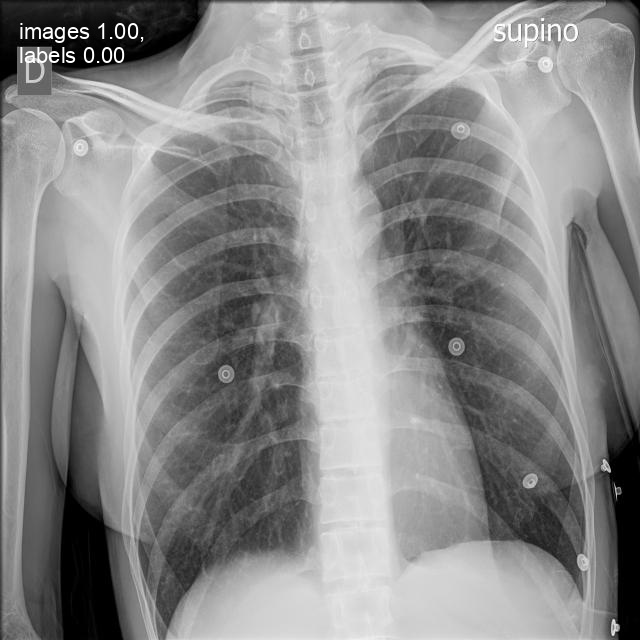

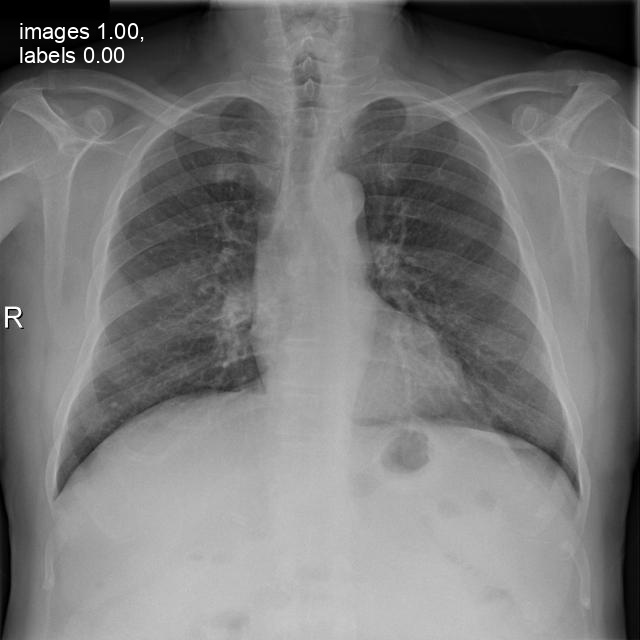

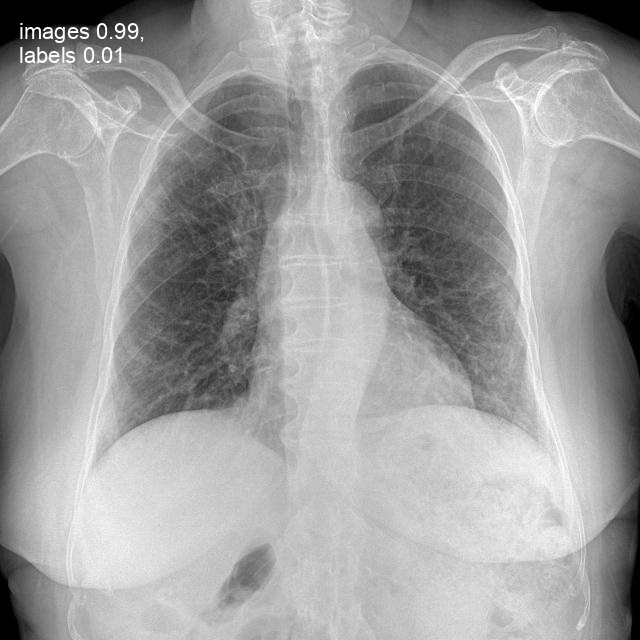

In [ ]:
from IPython.display import Image, display

for image_path in glob.glob('/content/runs/classify/predict/*.jpg')[:3]:
  display(Image(filename=image_path, width=600))
  print("\n")